 # Using  EIA API

https://www.eia.gov/opendata/

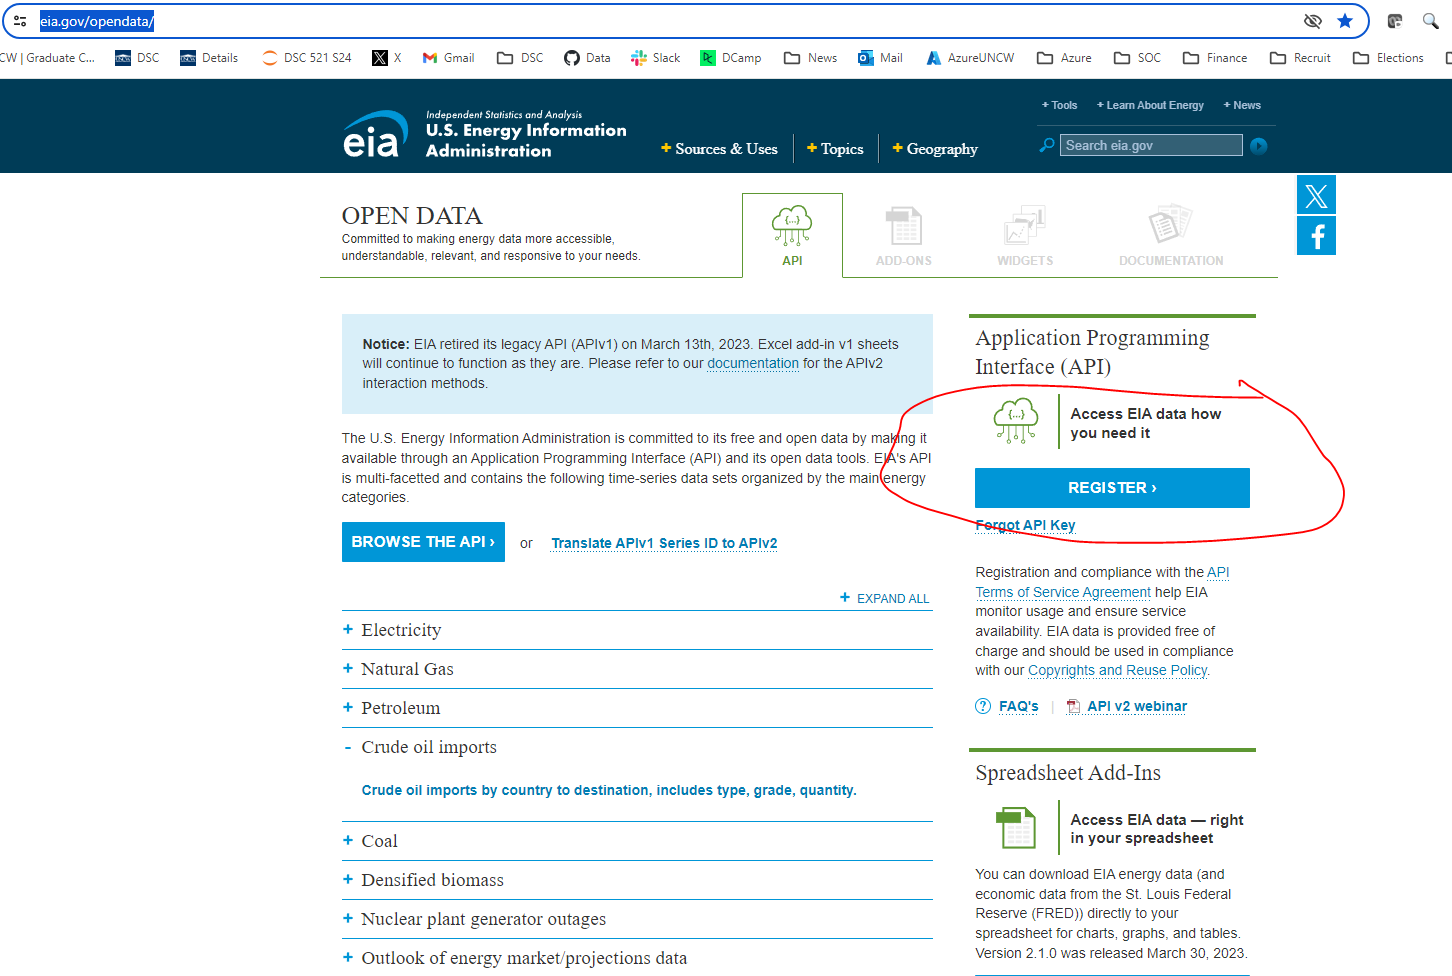


In [1]:
import pandas as pd
import requests

# API Key from EIA
api_key = 'VyDvKGAfe2JYP3sYPZbX3dCypgx4416lfj5Vf1ax'


############### Monthly ####################
s='&frequency=monthly&data[0]=value&facets[series][]=EMM_EPM0_PTE_NUS_DPG&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'


url='https://api.eia.gov/v2/petroleum/pri/gnd/data/?api_key=' + api_key+ s

r = requests.get(url)
j = r.json()
if r.status_code == 200:
        print('Success!')
else:
        print('Error')
        
df = pd.DataFrame(j.get('response').get('data'))
df['Date'] = pd.to_datetime(df['period'], format='%Y-%m')

Success!


In [2]:
df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,Date
0,2026-01,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,2.936,$/GAL,2026-01-01
1,2025-12,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.024,$/GAL,2025-12-01
2,2025-11,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.179,$/GAL,2025-11-01
3,2025-10,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.19,$/GAL,2025-10-01
4,2025-09,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.293,$/GAL,2025-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
389,1993-08,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,1.062,$/GAL,1993-08-01
390,1993-07,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,1.078,$/GAL,1993-07-01
391,1993-06,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,1.097,$/GAL,1993-06-01
392,1993-05,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,1.1,$/GAL,1993-05-01


In [3]:
df.dtypes

period                        object
duoarea                       object
area-name                     object
product                       object
product-name                  object
process                       object
process-name                  object
series                        object
series-description            object
value                         object
units                         object
Date                  datetime64[ns]
dtype: object

In [4]:
df['value']=pd.to_numeric(df['value'])

In [5]:
df.dtypes

period                        object
duoarea                       object
area-name                     object
product                       object
product-name                  object
process                       object
process-name                  object
series                        object
series-description            object
value                        float64
units                         object
Date                  datetime64[ns]
dtype: object

<Axes: xlabel='Date'>

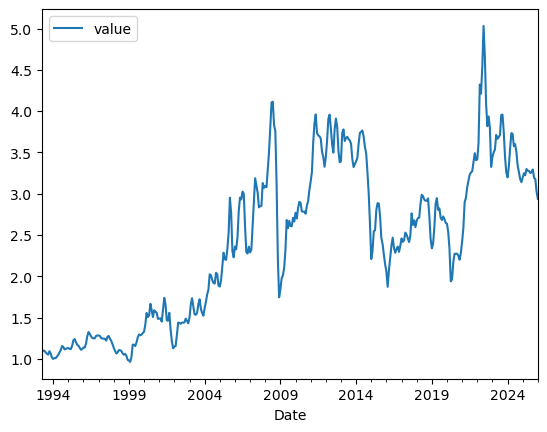

In [6]:
df.set_index('Date').plot()